## Asunciones Regresión Lineal

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.

El objetivo de este pairprgramming es que evaluéis si vuestro set de datos cumple todas las asunciones que se deben cumplir para hacer una regresión lineal. Recordamos que estas asunciones son:

>Cada asunción la deberéis testar de forma visual y analítica.

In [1]:
import numpy as np
import pandas as pd
import random 

import matplotlib.pyplot as plt
import seaborn as sns
import sidetable as stb

from scipy import stats
import researchpy as rp
from scipy.stats import levene
from scipy.stats import kstest

plt.rcParams["figure.figsize"] = (10,8) 
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv('../archivos/coste_vida_valido.csv', index_col = 0)

In [3]:
df.sample(3)

,city,country,mcdonalds,cappuccino,milk,rice,eggs,chicken,beef,banana,water,wine,beer,cigarettes_marlboro,public_transport_ticket,taxi,gasoline,basic,internet,gym_monthly,cinema,preschool,primary_school,apt_3beds_outcentre,monthly_salary
840,Choloma,Honduras,5.50,1.62,0.87,1.33,1.80,3.50,5.48,0.95,1.15,3.08,1.35,2.05,0.20,1.00,0.80,27.75,32.59,24.361158,5.69,71.00,960.00,200.00,538.27969
164,Surabaya,Indonesia,9.48,1.50,1.61,2.22,3.59,9.95,15.85,1.90,0.53,6.85,1.57,6.32,1.58,1.16,2.07,197.83,29.26,52.720000,9.48,485.53,8965.11,1368.17,1579.61000
608,Pasig City,Philippines,4.30,1.57,0.57,0.53,0.91,2.55,4.46,0.66,0.32,3.68,1.54,3.17,0.18,0.20,1.27,28.15,9.52,16.890000,2.46,42.99,4452.14,195.28,698.10000


In [4]:
list(df['basic'].unique())

[182.13,
 66.0,
 59.65,
 43.57,
 58.07,
 37.06,
 128.77,
 83.88,
 67.63,
 553.99,
 79.55,
 66.56,
 26.53,
 69.27,
 48.85,
 28.27,
 31.81,
 55.64,
 145.92,
 171.22,
 98.89,
 180.61,
 68.88,
 48.19,
 24.93,
 92.43,
 33.92,
 36.49,
 299.36,
 40.46,
 28.69,
 21.1,
 199.44,
 206.04,
 74.15,
 140.05,
 36.3,
 71.32,
 93.12,
 76.64,
 67.77,
 52.99,
 30.78,
 45.79,
 163.78,
 74.36,
 45.92,
 42.69,
 39.47,
 25.46,
 49.82,
 92.53,
 53.62,
 56.41,
 67.58,
 53.07,
 89.91,
 42.81,
 199.78,
 92.87,
 38.07,
 59.83,
 138.18,
 48.49,
 35.59,
 48.9,
 92.83,
 39.99,
 156.11,
 37.01,
 47.45,
 123.31,
 34.2,
 166.08,
 41.59,
 34.17,
 32.39,
 170.42,
 41.97,
 63.46,
 84.52,
 166.22,
 28.18,
 71.18,
 173.45,
 213.22,
 53.86,
 64.83,
 127.96,
 145.68,
 159.71,
 131.53,
 49.32,
 38.09,
 21.56,
 70.83,
 42.71,
 185.0,
 133.25,
 72.6,
 170.85,
 148.65,
 37.98,
 36.92,
 21.35,
 56.94,
 106.1,
 31.99,
 209.47,
 75.22,
 13.51,
 43.6,
 181.61,
 221.73,
 104.88,
 308.3,
 46.76,
 48.36,
 141.08,
 37.97,
 280.06,
 80.09

In [5]:
df['basic'].isnull().sum()

0

In [6]:
df['basic'].describe()

count    4081.000000
mean      135.718165
std        85.441646
min         6.070000
25%        67.960000
50%       127.500000
75%       184.480000
max      1066.670000
Name: basic, dtype: float64

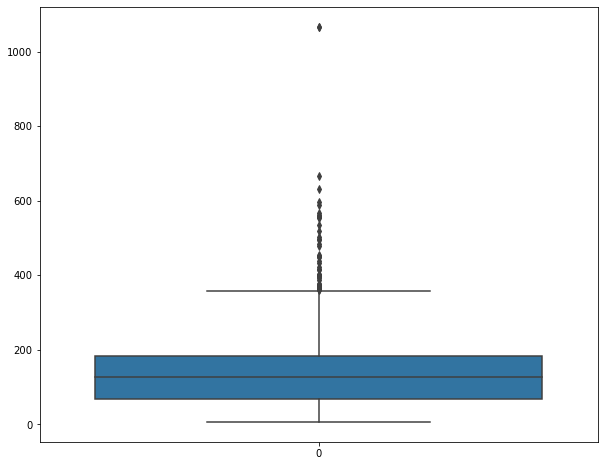

In [7]:
sns.boxplot(df['basic']);

In [8]:
df['basic'].isnull().sum()

0

In [9]:
df['basic'].dtypes

dtype('float64')

In [10]:
df.shape

(4081, 25)

1- Normalidad (ya la deberíais haber evaluado)

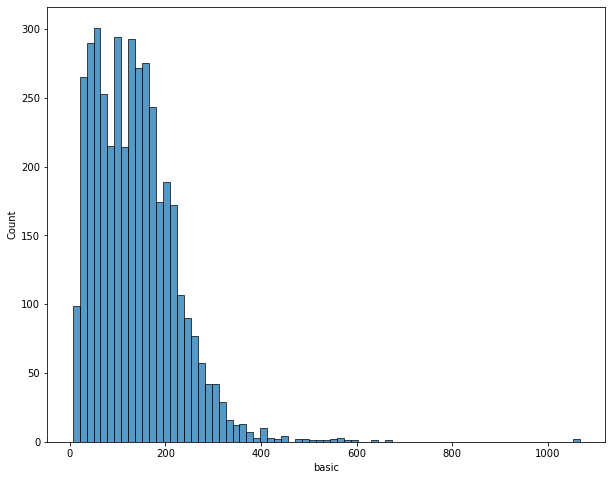

In [11]:
sns.histplot(df['basic']);

In [12]:
stats.shapiro(df["basic"])

ShapiroResult(statistic=0.9131569862365723, pvalue=2.1159606811304738e-43)

Buscamos una variable que sí cumpla con el criterio de normalidad hasta que aprendamos a normalizar los datos.

In [13]:
numericas = df.select_dtypes(include=np.number)

In [14]:
for col in numericas.columns:
    print(f'{col} = {stats.shapiro(numericas[col])[1]}')

mcdonalds = 3.4838724543004026e-29
cappuccino = 8.958853588520797e-30
milk = 0.0
rice = 0.0
eggs = 6.608482079321293e-38
chicken = 0.0
beef = 0.0
banana = 0.0
water = 0.0
wine = 6.483023267290907e-40
beer = 9.509071249061776e-41
cigarettes_marlboro = 0.0
public_transport_ticket = 0.0
taxi = 1.0709563643448847e-39
gasoline = 9.793950713047217e-25
basic = 2.1159606811304738e-43
internet = 0.0
gym_monthly = 0.0
cinema = 2.476649800063862e-30
preschool = 0.0
primary_school = 0.0
apt_3beds_outcentre = 0.0
monthly_salary = 0.0


No tenemos ninguna variable numércia que cumpla con la normalidad.

2- Homogeneidad de varianzas

In [15]:
len(numericas.columns)

23

In [16]:
for i, colum in enumerate(numericas.columns): 
    print(i, colum)

0 mcdonalds
1 cappuccino
2 milk
3 rice
4 eggs
5 chicken
6 beef
7 banana
8 water
9 wine
10 beer
11 cigarettes_marlboro
12 public_transport_ticket
13 taxi
14 gasoline
15 basic
16 internet
17 gym_monthly
18 cinema
19 preschool
20 primary_school
21 apt_3beds_outcentre
22 monthly_salary


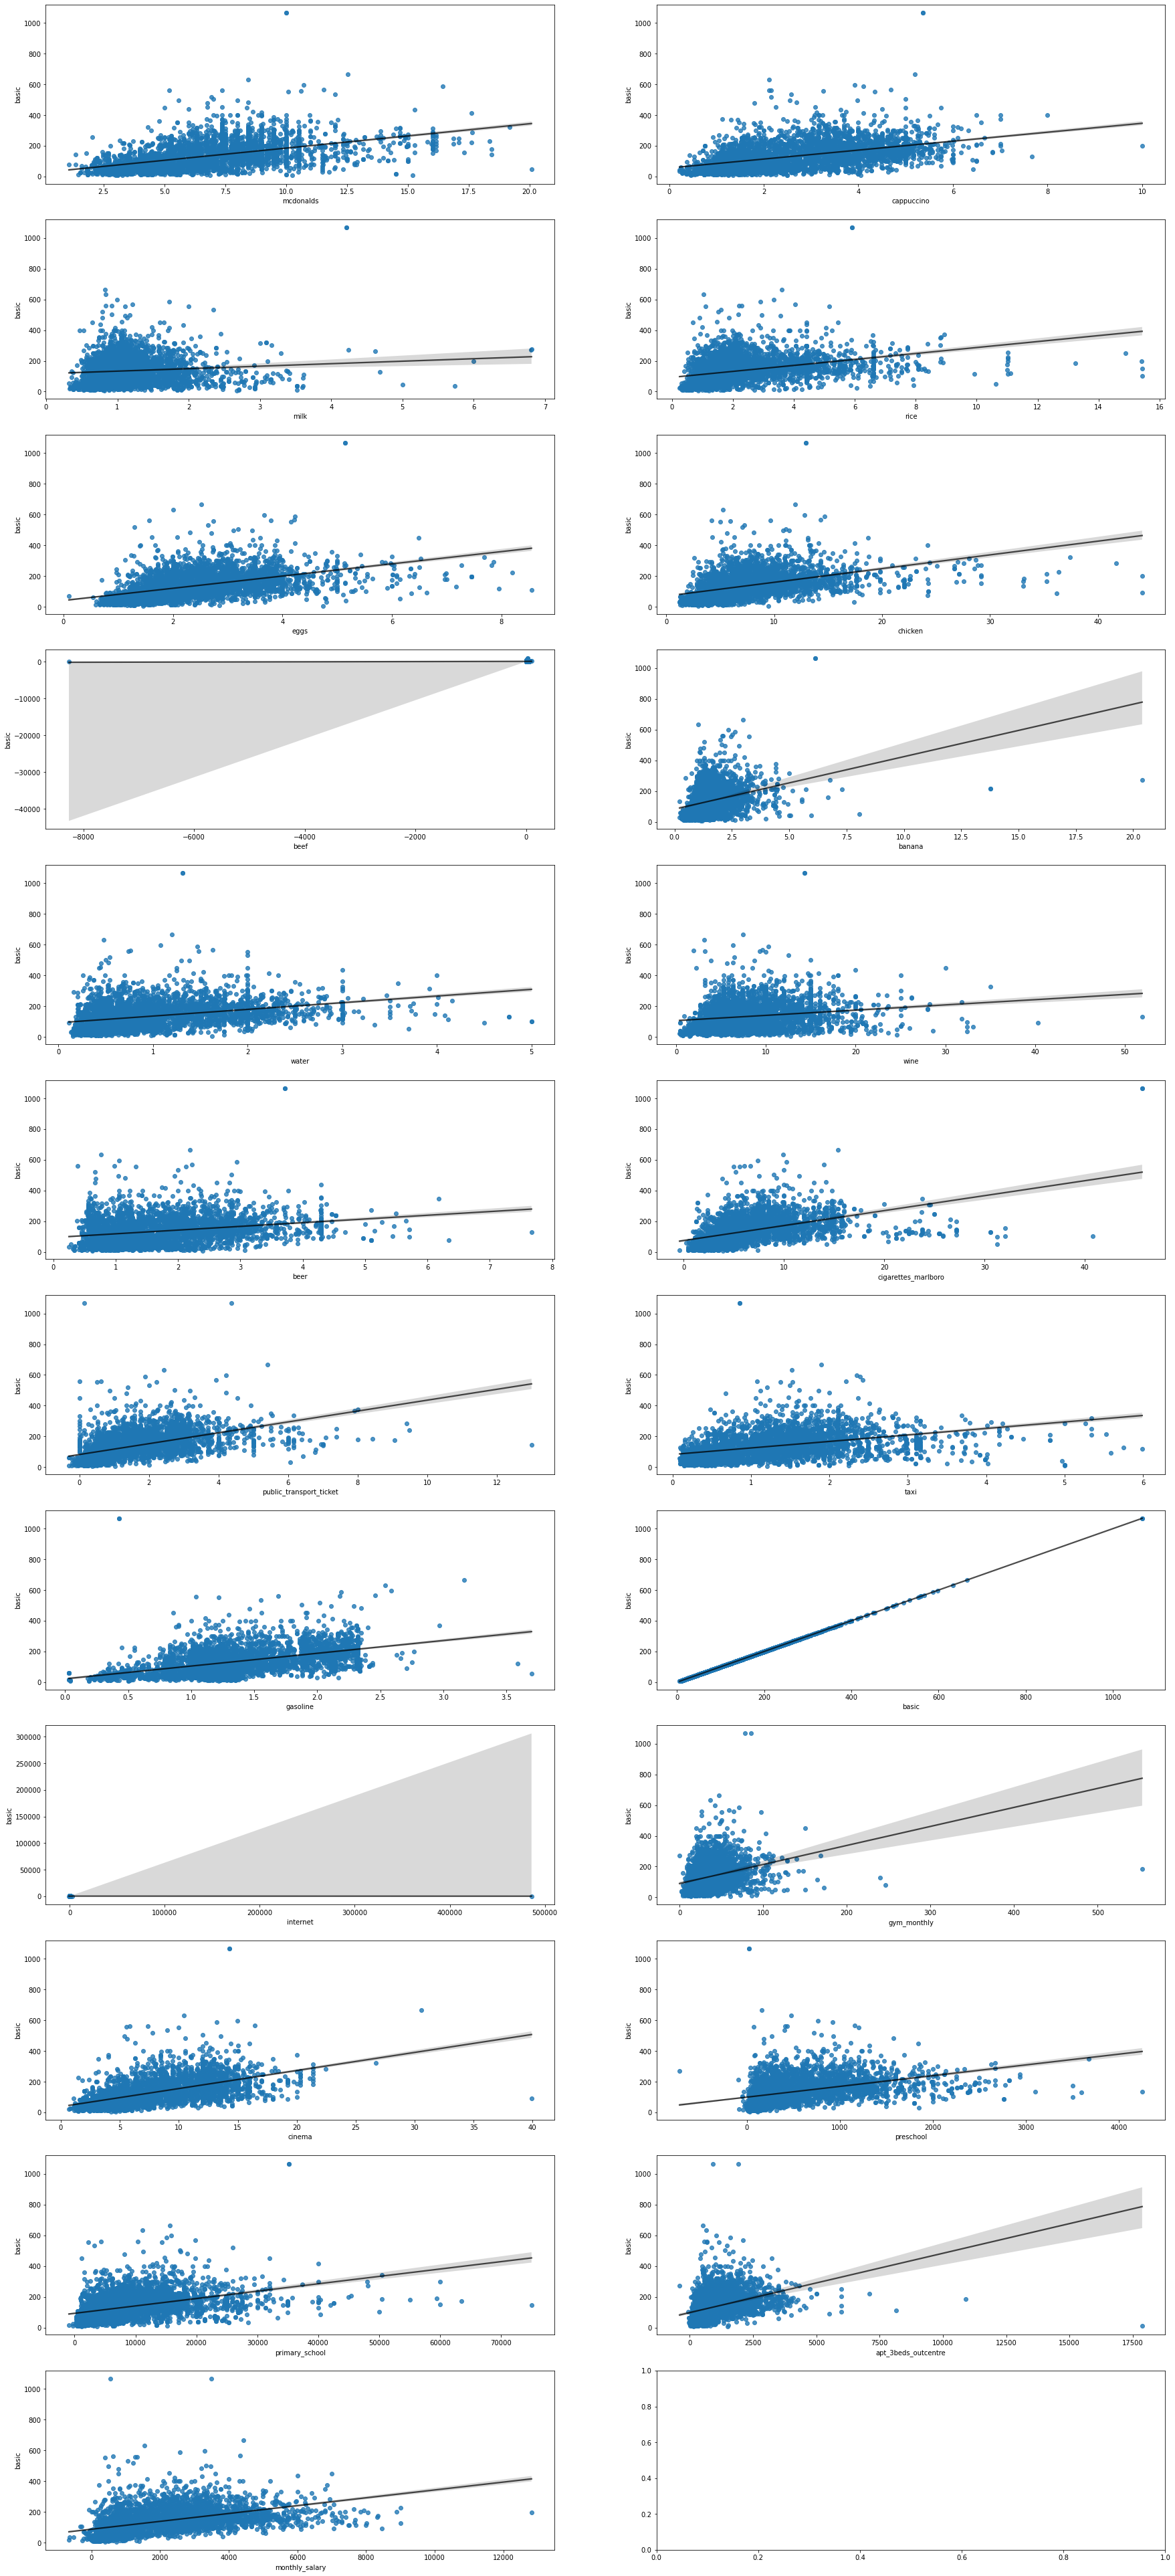

In [23]:
fig, axes = plt.subplots(12,2, figsize = (30, 70))
axes = axes.flat

columnas_numeric = numericas.columns

for i, colum in enumerate(columnas_numeric): 
    sns.regplot(
        data = numericas,
        x = colum,
        y = 'basic',
        #color = lista_colores[i],
        line_kws = {"color": "black", "alpha": 0.7 }, 
        ax = axes[i])

In [28]:
resultados = {}

# seleccionamos solo las columnas numéricas y eliminamos la columna de precio
numericas_col = df.select_dtypes(include = np.number).drop("basic", axis = 1).columns

#iteremos por la lista de las columnas numéricas
for col in numericas.columns:
    # calculamos el p-valor de test
    statistic, p_val = levene(numericas[col], numericas.basic, center='median')
    # lo almacenamos en el diccionario
    resultados[col] = p_val

In [29]:
resultados

{'mcdonalds': 0.0,
 'cappuccino': 0.0,
 'milk': 0.0,
 'rice': 0.0,
 'eggs': 0.0,
 'chicken': 0.0,
 'beef': 1.727133329023769e-150,
 'banana': 0.0,
 'water': 0.0,
 'wine': 0.0,
 'beer': 0.0,
 'cigarettes_marlboro': 0.0,
 'public_transport_ticket': 0.0,
 'taxi': 0.0,
 'gasoline': 0.0,
 'basic': 1.0,
 'internet': 0.5125802995465959,
 'gym_monthly': 0.0,
 'cinema': 0.0,
 'preschool': 0.0,
 'primary_school': 0.0,
 'apt_3beds_outcentre': 0.0,
 'monthly_salary': 0.0}

3- Independencia de las variables

Hemos estado observando la independencia a lo largo de los jupyter. Si queremos hacer regresión lineal habrá que eliminar alguna variable.

In [30]:
mask = np.triu(np.ones_like(numericas.corr(),dtype = np.bool_))

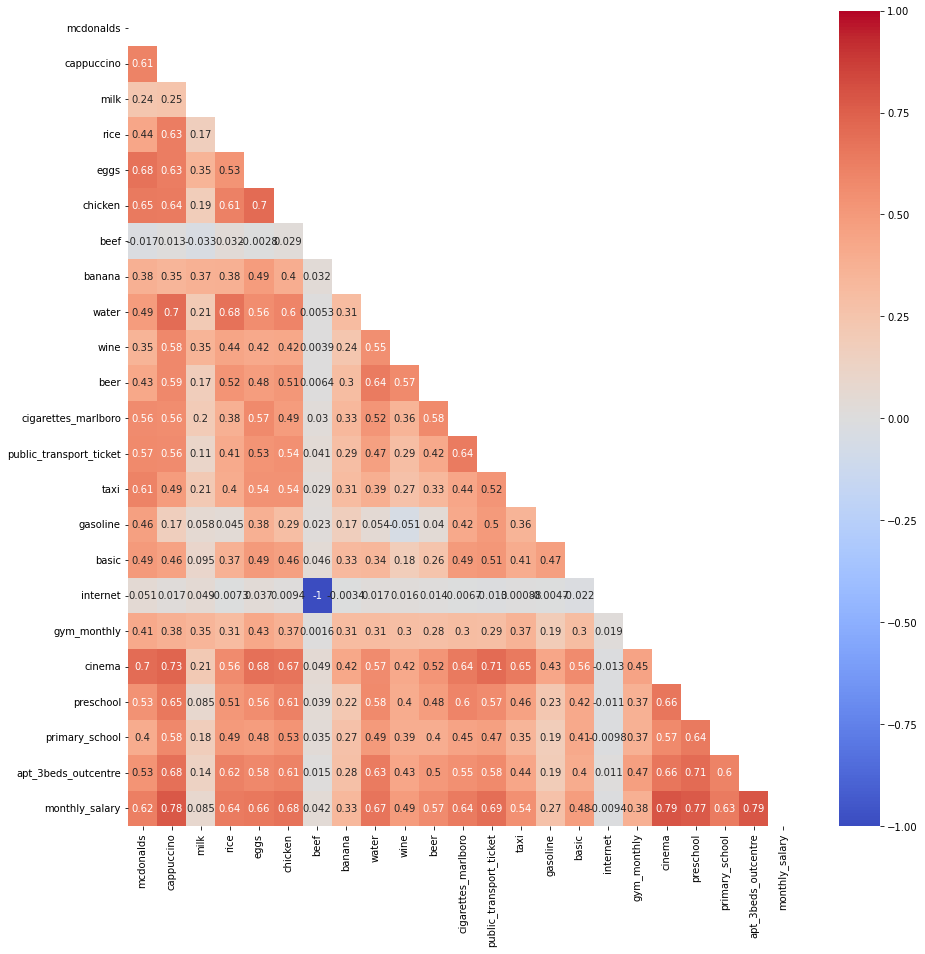

In [31]:
plt.figure(figsize= (15,15))

sns.heatmap(numericas.corr(),
            cmap = 'coolwarm',
            annot = True,
            mask = mask,
            vmin = -1,
            vmax= 1);